In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 8

In [2]:
plt.rcParams['figure.figsize'] = 15, 8

## Method 1

In [3]:
def read_uint12(data_chunk):
    data = np.frombuffer(data_chunk, dtype=np.uint8)
    fst_uint8, mid_uint8, lst_uint8 = np.reshape(data, (data.shape[0] // 3, 3)).astype(np.uint16).T
    fst_uint12 = (fst_uint8 << 4) + (mid_uint8 >> 4)
    snd_uint12 = ((mid_uint8 % 16) << 8) + lst_uint8
    return np.reshape(np.concatenate((fst_uint12[:, None], snd_uint12[:, None]), axis=1), 2 * fst_uint12.shape[0])

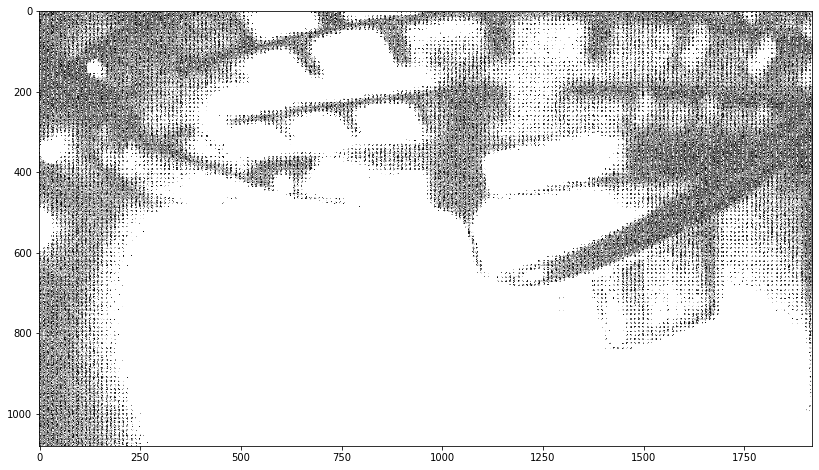

In [4]:
plt.imshow(read_uint12(np.fromfile(r'C:\Users\baps\Desktop\00005.raw')).reshape(1080,1920), cmap='gray'); 

In [5]:
a = read_uint12(np.fromfile(r'C:\Users\baps\Desktop\00005.raw')).reshape(1080,1920)

In [6]:
a

array([[2343, 1858, 1558, ...,  297, 2840, 1824],
       [2004, 1941, 1444, ..., 2121, 2534,  470],
       [1270,  253, 1382, ..., 3497, 2984, 1676],
       ...,
       [2105, 2828, 2615, ..., 4095, 4095, 4095],
       [2245, 2533, 2666, ..., 4095, 4095, 4095],
       [2486,  479, 1927, ..., 4095, 4095, 4095]], dtype=uint16)

In [7]:
plt.imsave(r'C:\Users\baps\Desktop\test1.jpeg',a,cmap='gray')

## Method 2

In [8]:
import bitstring
with open(r'C:\Users\baps\Desktop\00000.raw', 'rb') as f:
    data=f.read()
images=np.zeros(int(2*len(data)/3),dtype=np.uint16)
ii=0
for jj in range(0,int(len(data))-2,3):
    a=bitstring.Bits(bytes=data[jj:jj+3],length=24)
    images[ii],images[ii+1] = a.unpack('uint:12,uint:12')
    ii=ii+2
images = np.reshape(images,(1080,1920))

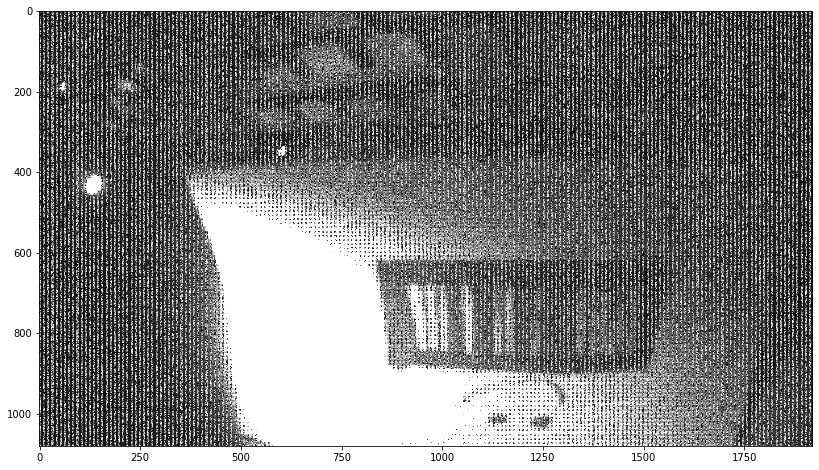

In [9]:
plt.imshow(images, cmap='gray'); #F:\00002.raw

In [10]:
plt.imsave(r'C:\Users\baps\Desktop\test3.png',images,cmap='gray')

In [11]:
images

array([[ 466,  130,  561, ..., 2011,  498,  222],
       [ 145, 1177,  209, ..., 3081,  240, 2129],
       [ 289,  626,  530, ..., 1422,  257,   68],
       ...,
       [ 336, 2451,  352, ..., 1098,  546,  282],
       [ 449, 2200,  400, ..., 1070,  659, 1919],
       [ 481, 1717,  434, ..., 2045,  546,  447]], dtype=uint16)